# Assignment_16_ANN(Forestfires)

In [ ]:
PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [34]:
df = pd.read_csv('forestfires.csv')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [35]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

<AxesSubplot:xlabel='size_category', ylabel='count'>

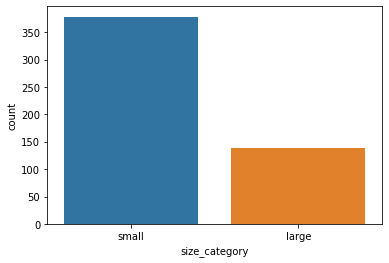

In [36]:
sns.countplot(df['size_category'])

In [37]:
df.dtypes

month             object
day               object
FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category     object
dtype: object

In [38]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [39]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
df['size_category'].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [41]:
df.drop(['month', 'day'], axis=1, inplace=True)

In [42]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


In [43]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
le = LabelEncoder()
df['size_category'] = le.fit_transform(df['size_category'])

In [45]:
df.corr()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
FFMC,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,0.019306,...,-0.281535,-0.454771,0.031833,-0.040634,-0.074327,-0.037230,-0.088964,-0.005998,0.076609,-0.022063
DMC,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.012010,...,-0.317899,-0.105647,-0.001946,-0.050403,-0.407404,-0.081980,-0.074218,-0.187632,0.110907,-0.034715
DC,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.004220,...,-0.399277,-0.115064,-0.100887,-0.186183,-0.650427,-0.114209,-0.078380,0.093279,0.531857,-0.019428
ISI,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.046695,...,-0.249777,-0.103588,0.020982,0.111516,-0.143520,-0.060493,-0.076559,-0.071154,-0.068877,0.008726
temp,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.071949,...,-0.320015,-0.146520,0.142588,0.051015,-0.341797,-0.045540,-0.053798,-0.053513,0.088006,-0.006021
RH,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.064506,...,0.140430,0.170923,0.013185,0.009382,-0.089836,0.086822,-0.035885,-0.072334,-0.062596,0.045243
wind,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,0.118090,...,-0.029431,-0.070245,-0.040645,0.012124,0.181433,0.015054,0.011864,-0.053850,-0.181476,-0.059113
rain,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.004261,...,-0.014698,-0.004566,-0.013390,-0.013510,-0.020744,-0.004566,-0.003225,-0.012665,-0.051733,-0.050001
area,0.040122,0.072994,0.049383,0.008258,0.097844,-0.075519,0.012317,-0.007366,1.000000,-0.052911,...,-0.020732,-0.012589,0.006149,-0.020314,-0.045596,0.006264,-0.008893,-0.016878,0.056573,-0.311322
dayfri,0.019306,-0.012010,-0.004220,0.046695,-0.071949,0.064506,0.118090,-0.004261,-0.052911,1.000000,...,0.046323,-0.027643,-0.048969,0.006000,0.036205,0.056423,-0.019527,-0.045585,0.107671,0.021810


In [46]:
x = df.iloc[:,:-1]
y = df[['size_category']] 

In [47]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,0,1,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,0,1,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
y

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
512,0
513,0
514,0
515,1


In [49]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 42, stratify = y)

In [50]:
print(x_train.shape)
print(x_test.shape)

(413, 28)
(104, 28)


In [51]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train) 
x_test_scaled  = scaler.fit_transform(x_test) 
print(x_test)
print(x_test_scaled)

     FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
341  91.9  111.7  770.3   6.5  15.7  51   2.2   0.0   0.00       0  ...   
43   92.5   88.0  698.6   7.1  19.6  48   2.7   0.0   0.00       0  ...   
219  90.1   39.7   86.6   6.2  15.2  27   3.1   0.0  31.86       0  ...   
413  93.7  231.1  715.1   8.4  26.4  33   3.6   0.0   0.00       0  ...   
35   90.3   80.7  730.2   6.3  18.2  62   4.5   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
446  92.0  203.2  664.5   8.1  19.1  70   2.2   0.0   0.00       0  ...   
318  92.8  119.0  783.5   7.5  21.6  27   2.2   0.0   0.00       0  ...   
41   90.2   96.9  624.2   8.9  18.4  42   6.7   0.0   0.00       0  ...   
256  94.2  117.2  581.1  11.0  23.9  41   2.2   0.0   8.02       0  ...   
44   90.1   82.9  735.7   6.2  12.9  74   4.9   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
341         0         

In [52]:
model = Sequential()
model.add(Dense(units = 50, input_dim = 28, activation = 'tanh', kernel_initializer = 'normal'))
model.add(Dense(units = 6, activation = 'tanh', kernel_initializer = 'normal'))
model.add(Dense(units = 1, activation = 'sigmoid', kernel_initializer = 'normal')) 

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 50)                1450      
                                                                 
 dense_7 (Dense)             (None, 6)                 306       
                                                                 
 dense_8 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,763
Trainable params: 1,763
Non-trainable params: 0
_________________________________________________________________


In [54]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Accuracy'])

In [55]:
model.fit(x_train_scaled, y_train, batch_size = 50, epochs = 100)

Epoch 1/100
9/9 [==============================] - 1s 2ms/step - loss: 0.6913 - Accuracy: 0.6320
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6867 - Accuracy: 0.7409
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6812 - Accuracy: 0.7724
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6738 - Accuracy: 0.7724
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6639 - Accuracy: 0.7748
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6502 - Accuracy: 0.7797
Epoch 7/100
9/9 [==============================] - 0s 1ms/step - loss: 0.6327 - Accuracy: 0.7845
Epoch 8/100
9/9 [==============================] - 0s 2ms/step - loss: 0.6112 - Accuracy: 0.7869
Epoch 9/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5891 - Accuracy: 0.7845
Epoch 10/100
9/9 [==============================] - 0s 2ms/step - loss: 0.5669 - Accuracy: 0.7869
Epoch 11/100
9/9 [===========

9/9 [==============================] - 0s 2ms/step - loss: 0.0689 - Accuracy: 0.9903
Epoch 85/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0680 - Accuracy: 0.9855
Epoch 86/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0646 - Accuracy: 0.9927
Epoch 87/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0659 - Accuracy: 0.9952
Epoch 88/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0645 - Accuracy: 0.9903
Epoch 89/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0620 - Accuracy: 0.9855
Epoch 90/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0591 - Accuracy: 0.9952
Epoch 91/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0596 - Accuracy: 0.9952
Epoch 92/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0579 - Accuracy: 0.9976
Epoch 93/100
9/9 [==============================] - 0s 5ms/step - loss: 0.0572 - Accuracy: 0.9879
Epoch 94/100
9/9 [===============

### Finding Best Params - batch size & epochs

In [56]:
def toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test):
   
    #defining list of hyperparameters
    batch_size_list = [5 , 10 , 15 , 20]
    epoch_list      = [5 , 10 , 50 , 100]
           
    # initializing the trials
    for batch_trial in batch_size_list:
        for epochs_trial in epoch_list:
            
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=50, input_dim=x_train_scaled.shape[1], kernel_initializer='normal', activation='tanh'))
            
            # Defining the Second layer of the model
            model.add(Dense(units=6, kernel_initializer='normal', activation='tanh'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
 
            # Compiling the model
            model.compile(loss='binary_crossentropy', optimizer='adam',  metrics=['accuracy'])
 
            # Fitting the ANN to the Training set
            model_trained = model.fit(x_train_scaled, y_train ,batch_size = batch_trial, epochs = epochs_trial, verbose=0)
               
             # Fetching the accuracy of the training
            Accuracy_train = model_trained.history['accuracy'][-1]
            # printing the results of the current iteration
            print('batch_size:', batch_trial,'-', 'epochs:',epochs_trial, 'Accuracy:',Accuracy_train)

# Calling the function
toFindBestParams(x_train_scaled, y_train, x_test_scaled, y_test)

batch_size: 5 - epochs: 5 Accuracy: 0.8062953948974609
batch_size: 5 - epochs: 10 Accuracy: 0.9152542352676392
batch_size: 5 - epochs: 50 Accuracy: 0.9830508232116699
batch_size: 5 - epochs: 100 Accuracy: 0.9927361011505127
batch_size: 10 - epochs: 5 Accuracy: 0.7893462181091309
batch_size: 10 - epochs: 10 Accuracy: 0.8740919828414917
batch_size: 10 - epochs: 50 Accuracy: 0.9878934621810913
batch_size: 10 - epochs: 100 Accuracy: 0.9927361011505127
batch_size: 15 - epochs: 5 Accuracy: 0.7820823192596436
batch_size: 15 - epochs: 10 Accuracy: 0.8280871510505676
batch_size: 15 - epochs: 50 Accuracy: 0.9830508232116699
batch_size: 15 - epochs: 100 Accuracy: 0.9878934621810913
batch_size: 20 - epochs: 5 Accuracy: 0.7820823192596436
batch_size: 20 - epochs: 10 Accuracy: 0.7990314960479736
batch_size: 20 - epochs: 50 Accuracy: 0.9830508232116699
batch_size: 20 - epochs: 100 Accuracy: 0.9927361011505127


In [57]:
model.compile(optimizer='Adam',loss='binary_crossentropy', metrics=['Accuracy'])
model.fit(x_train_scaled, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
42/42 [==============================] - 1s 1ms/step - loss: 0.0672 - Accuracy: 0.9806
Epoch 2/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0571 - Accuracy: 0.9782
Epoch 3/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0533 - Accuracy: 0.9806
Epoch 4/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0520 - Accuracy: 0.9903
Epoch 5/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0403 - Accuracy: 0.9903
Epoch 6/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0446 - Accuracy: 0.9831
Epoch 7/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0673 - Accuracy: 0.9782
Epoch 8/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0503 - Accuracy: 0.9782
Epoch 9/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0362 - Accuracy: 0.9903
Epoch 10/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0424 - Accuracy: 0.9879
Epoch 11/

42/42 [==============================] - 0s 2ms/step - loss: 0.0081 - Accuracy: 0.9952
Epoch 84/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0065 - Accuracy: 1.0000
Epoch 85/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0051 - Accuracy: 1.0000
Epoch 86/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0048 - Accuracy: 1.0000
Epoch 87/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0048 - Accuracy: 1.0000
Epoch 88/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0049 - Accuracy: 1.0000
Epoch 89/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0061 - Accuracy: 1.0000
Epoch 90/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0063 - Accuracy: 0.9976
Epoch 91/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0091 - Accuracy: 0.9976
Epoch 92/100
42/42 [==============================] - 0s 2ms/step - loss: 0.0091 - Accuracy: 0.9976
Epoch 93/100


In [58]:
#checking model accuracy for model testing
y_predict = model.predict(x_test_scaled)
final_table   = pd.DataFrame(x_test) 
final_table['burned_area'] = y_test  
final_table['predicted_burned_prob'] = y_predict 

def probToBinary(varProb):
    if varProb >= 0.5:
        return 1
    else:
        return 0

final_table['pred_burn_area'] = final_table['predicted_burned_prob'].apply(probToBinary)
final_table

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,burned_area,predicted_burned_prob,pred_burn_area
341,91.9,111.7,770.3,6.5,15.7,51,2.2,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.999919,1
43,92.5,88.0,698.6,7.1,19.6,48,2.7,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.999919,1
219,90.1,39.7,86.6,6.2,15.2,27,3.1,0.0,31.86,0,...,0,0,1,0,0,0,0,0,0.000130,0
413,93.7,231.1,715.1,8.4,26.4,33,3.6,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.999919,1
35,90.3,80.7,730.2,6.3,18.2,62,4.5,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.999919,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446,92.0,203.2,664.5,8.1,19.1,70,2.2,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.999919,1
318,92.8,119.0,783.5,7.5,21.6,27,2.2,0.0,0.00,0,...,0,0,0,0,0,0,1,1,0.999919,1
41,90.2,96.9,624.2,8.9,18.4,42,6.7,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0.999919,1
256,94.2,117.2,581.1,11.0,23.9,41,2.2,0.0,8.02,0,...,0,0,0,0,0,0,0,0,0.000132,0


In [59]:
final_table['burned_area'].value_counts()

1    76
0    28
Name: burned_area, dtype: int64

In [60]:
final_table['pred_burn_area'].value_counts()

1    78
0    26
Name: pred_burn_area, dtype: int64

In [62]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy score for Test Data    = ", accuracy_score(final_table['burned_area'],final_table['pred_burn_area']))

Accuracy score for Test Data    =  0.9615384615384616


In [63]:
print("Confusion Matrix for Test Data  =\n", confusion_matrix(final_table['burned_area'],final_table['pred_burn_area']))

Confusion Matrix for Test Data  =
 [[25  3]
 [ 1 75]]


In [64]:
print("Classification Report for Test Data  =\n", classification_report(final_table['burned_area'],final_table['pred_burn_area']))

Classification Report for Test Data  =
               precision    recall  f1-score   support

           0       0.96      0.89      0.93        28
           1       0.96      0.99      0.97        76

    accuracy                           0.96       104
   macro avg       0.96      0.94      0.95       104
weighted avg       0.96      0.96      0.96       104

